In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [57]:
df = pd.read_csv('futebol.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8453 non-null   int64  
 1   data                            8453 non-null   object 
 2   rodada                          8453 non-null   int64  
 3   estadio                         8442 non-null   object 
 4   arbitro                         6743 non-null   object 
 5   publico                         6742 non-null   float64
 6   publico_max                     4181 non-null   float64
 7   time_mandante                   8453 non-null   object 
 8   time_visitante                  8453 non-null   object 
 9   tecnico_mandante                6299 non-null   object 
 10  tecnico_visitante               6299 non-null   object 
 11  colocacao_mandante              6743 non-null   float64
 12  colocacao_visitante             67

## Tarefa 1: Estatísticas Descritivas e Visualizações Básicas

### 1. Distribuição de Gols
- Crie a coluna `gols_total = gols_mandante + gols_visitante`
- Plote um histograma da distribuição de gols totais
- Calcule e apresente:
  - Média
  - Mediana
  - Moda
  - Desvio padrão
  - Intervalo interquartil (IQR)

In [58]:
df['gols_total'] = df['gols_mandante'] + df['gols_visitante']

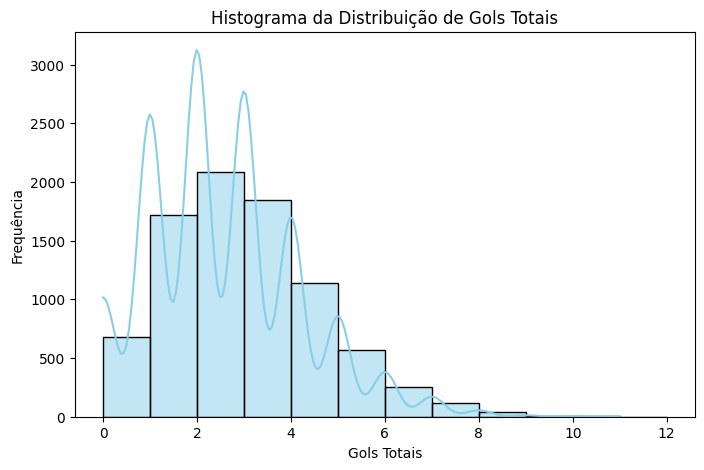

In [59]:
plt.figure(figsize=(8,5))
bins = range(int(df['gols_total'].min()), int(df['gols_total'].max()) + 2)
sns.histplot(df['gols_total'], bins=bins, kde=True, color='skyblue')
plt.title('Histograma da Distribuição de Gols Totais')
plt.xlabel('Gols Totais')
plt.ylabel('Frequência')
plt.show()

### 2. Mando de Campo
- Crie boxplots comparando gols de mandante vs. visitante
- Identifique e interprete outliers
- Compare as medidas de tendência central entre mandante e visitante



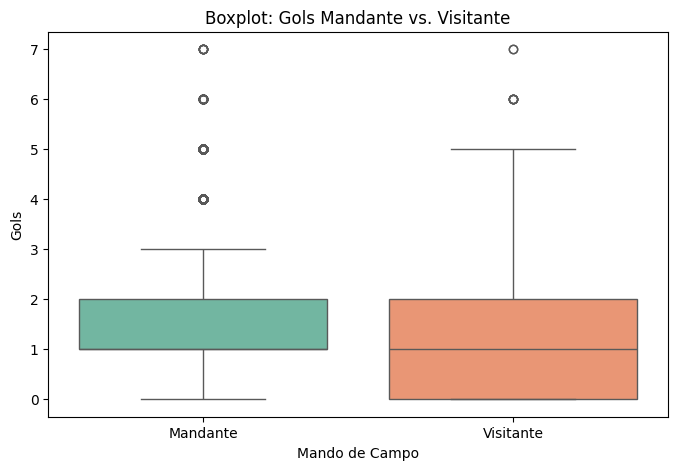

In [60]:
# Boxplots comparando gols de mandante vs. visitante
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['gols_mandante', 'gols_visitante']], palette='Set2')
plt.title('Boxplot: Gols Mandante vs. Visitante')
plt.ylabel('Gols')
plt.xlabel('Mando de Campo')
plt.xticks([0, 1], ['Mandante', 'Visitante'])
plt.show()

In [61]:
# Identificação de outliers
mandante_outliers = df['gols_mandante'][((df['gols_mandante'] - df['gols_mandante'].median()).abs() > 1.5 * stats.iqr(df['gols_mandante'].dropna()))]
visitante_outliers = df['gols_visitante'][((df['gols_visitante'] - df['gols_visitante'].median()).abs() > 1.5 * stats.iqr(df['gols_visitante'].dropna()))]

print(f'Outliers - Mandante: {mandante_outliers.count()} jogos')
print(f'Outliers - Visitante: {visitante_outliers.count()} jogos')

Outliers - Mandante: 1644 jogos
Outliers - Visitante: 34 jogos


In [62]:
# Medidas de tendência central
print('\nMedidas de tendência central:')
print('Mandante:')
print(f"  Média: {df['gols_mandante'].mean():.2f}")
print(f"  Mediana: {df['gols_mandante'].median():.2f}")
print(f"  Moda: {df['gols_mandante'].mode()[0]}")
print('\nVisitante:')
print(f"  Média: {df['gols_visitante'].mean():.2f}")
print(f"  Mediana: {df['gols_visitante'].median():.2f}")
print(f"  Moda: {df['gols_visitante'].mode()[0]}")


Medidas de tendência central:
Mandante:
  Média: 1.53
  Mediana: 1.00
  Moda: 1.0

Visitante:
  Média: 1.02
  Mediana: 1.00
  Moda: 0.0


### 3. Público
- Gráfico de barras: 10 times que mais jogaram em casa
- Estatísticas descritivas do público (considerando apenas dados não nulos)

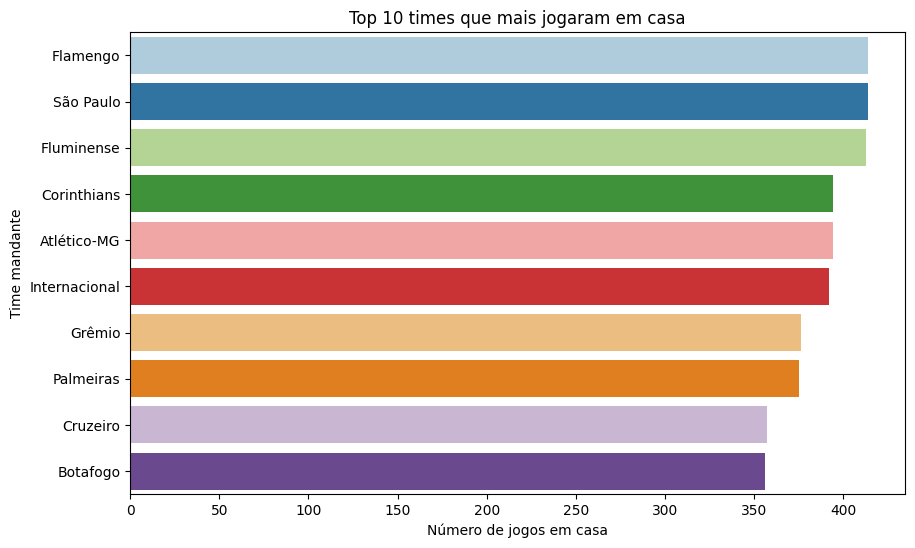

Estatísticas descritivas do público (apenas dados não nulos):
count     6742.000000
mean     16189.951943
std      14074.412391
min          0.000000
25%       5898.250000
50%      12685.500000
75%      22963.250000
max      82044.000000
Name: publico, dtype: float64


In [63]:
# Gráfico de barras: 10 times que mais jogaram em casa
plt.figure(figsize=(10,6))
top10_mandantes = df['time_mandante'].value_counts().head(10)
sns.barplot(
    x=top10_mandantes.values,
    y=top10_mandantes.index,
    hue=top10_mandantes.index,
    palette='Paired')
plt.title('Top 10 times que mais jogaram em casa')
plt.xlabel('Número de jogos em casa')
plt.ylabel('Time mandante')
plt.show()

# Estatísticas descritivas do público (apenas dados não nulos)
print('Estatísticas descritivas do público (apenas dados não nulos):')
print(df['publico'].dropna().describe())

# Tarefa 2: Teste de Hipótese

## 1. Hipóteses
- **H0:** A média de gols dos mandantes é igual à dos visitantes.  
- **H1:** A média de gols dos mandantes é maior que a dos visitantes.  

In [64]:
# Hipótese: “Times mandantes marcam significativamente mais gols que visitantes”
# Juntar as duas colunas e remover linhas com NaN
df_gols = df[["gols_mandante", "gols_visitante"]].dropna()

# Recriar as variáveis sem valores ausentes
gols_mandante = df_gols["gols_mandante"]
gols_visitante = df_gols["gols_visitante"]


diferenca_de_gols = (gols_mandante.sum() - gols_visitante.sum())
print(df['gols_mandante'].sum(), " + " ,df['gols_visitante'].sum(), " = ", diferenca_de_gols)
print('Diferença de gols   = ', diferenca_de_gols)

# --- Diferença entre as médias ---
media_mandante = gols_mandante.mean()
media_visitante = gols_visitante.mean()
diff_medias = media_mandante - media_visitante
print('Diferença de médias = ', diff_medias)


12916.0  +  8647.0  =  4269.0
Diferença de gols   =  4269.0
Diferença de médias =  0.5050875532418362


## 2. Teste t
- Usar `scipy.stats.ttest_ind()`  
- Nível de significância: α = 0,05  
- Passos: calcular o valor-p e interpretar.  

In [65]:
t_stat, p_val = stats.ttest_ind(gols_mandante, gols_visitante, alternative='greater')

#print(gols_visitante.info())

print("Estatística t:", t_stat)
print("Valor-p:", p_val)

Estatística t: 29.189561129282634
Valor-p: 4.386214303989559e-183


## 3. Resultados
- Diferença entre as médias (tamanho do efeito).  
- Ver se o resultado é estatisticamente significativo.  
- Comparar a importância prática da diferença.  

In [66]:
alpha = 0.05
if p_val < alpha:
    print("Rejeitamos H0. Evidência de que mandantes marcam mais gols.")
else:
    print("Não rejeitamos H0. Sem evidências de que mandantes marcam mais gols.")

n1, n2 = len(gols_mandante), len(gols_visitante)
var_pooled = ((n1 - 1)*gols_mandante.var() + (n2 - 1)*gols_visitante.var()) / (n1 + n2 - 2)
sd_pooled = np.sqrt(var_pooled)
cohens_d = diff_medias / sd_pooled

print(f"\nCohen's d (tamanho do efeito): {cohens_d:.3f}")

Rejeitamos H0. Evidência de que mandantes marcam mais gols.

Cohen's d (tamanho do efeito): 0.449




# Tarefa 3. Investigação Livre + Pitch

## Formulação de Hipotese

* **Hipótese Nula (H0):**
  A idade média dos titulares **não influencia** o desempenho ofensivo.

  $$
  μ_{\text{chutes, jovens}} = μ_{\text{chutes, velhos}} \quad \text{e} \quad μ_{\text{gols, jovens}} = μ_{\text{gols, velhos}}
  $$

* **Hipótese Alternativa (H1):**
  Times com idade média maior realizam **menos chutes** e fazem **menos gols** do que os times mais jovens.

  $$
  μ_{\text{chutes, jovens}} > μ_{\text{chutes, velhos}} \quad \text{e} \quad μ_{\text{gols, jovens}} > μ_{\text{gols, velhos}}
  $$
